In [24]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad

n= 1000
h = 0.01
a = np.zeros(1100)
Inum = np.zeros(1100)
Iden = np.zeros(1100)
errnum = np.zeros(1100)
errden = np.zeros(1100)
Exp_val = np.zeros(1100)

def fnum(r,a):
    return np.exp(-2*a*r)*(r*a-a**2*r**2/2 -r)

def fnumV(r,a):
    return np.exp(-2*a*r)*(r*a-a**2*r**2/2 -r-0.3)

def fden(r,a):
    return 2*(r**2)*np.exp(-2*a*r)

for i in range(0,500):
    a[i] = (i*h)
    Inum[i], errnum[i] = quad(fnum, 0 , np.inf ,args=(a[i],))
    Iden[i], errden[i] = quad(fden, 0 , np.inf ,args=(a[i],))
    Exp_val[i] = Inum[i]/Iden[i]

for i in range(500,801):
    a[i] = (i*h)
    Inum[i], errnum[i] = quad(fnumV, 0 , np.inf ,args=(a[i],))
    Iden[i], errden[i] = quad(fden, 0 , np.inf ,args=(a[i],))
    Exp_val[i] = Inum[i]/Iden[i]

for i in range(801,n):
    a[i] = (i*h)
    Inum[i], errnum[i] = quad(fnum, 0 , np.inf ,args=(a[i],))
    Iden[i], errden[i] = quad(fden, 0 , np.inf ,args=(a[i],))
    Exp_val[i] = Inum[i]/Iden[i]

Exp_val = Exp_val[1:]
a = a[1:]
min_val = np.argmin(Exp_val)
print("Minimum Alpha Value: ", a[min_val])
print("Minimum Expectation Value: ", Exp_val[min_val])


C:\Users\Aryan\AppData\Local\Temp\ipykernel_14276\1374166436.py:26: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Inum[i], errnum[i] = quad(fnum, 0 , np.inf ,args=(a[i],))
C:\Users\Aryan\AppData\Local\Temp\ipykernel_14276\1374166436.py:27: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Iden[i], errden[i] = quad(fden, 0 , np.inf ,args=(a[i],))


Minimum Alpha Value:  8.0
Minimum Expectation Value:  -7.200000000000109


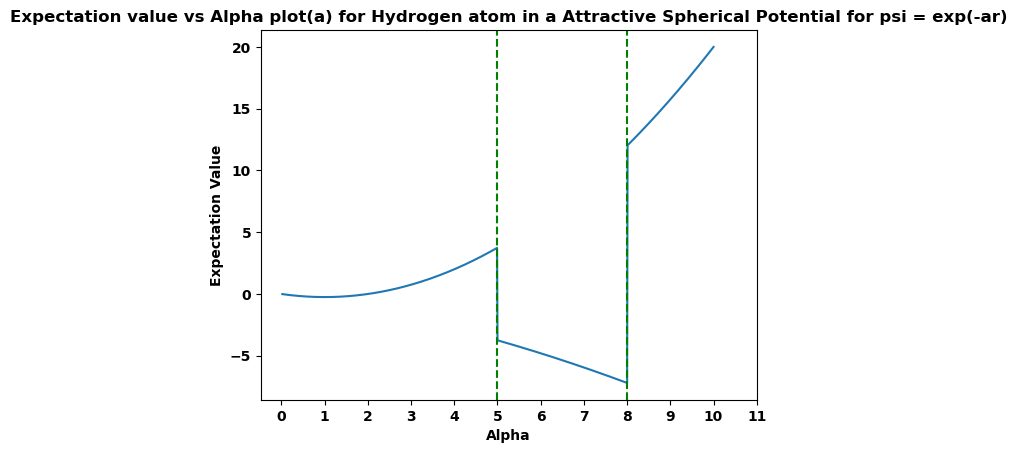

In [23]:
plt.plot(a[1:n],Exp_val[1:n])
plt.xlabel('Alpha')
plt.xticks(np.arange(0, 12, 1))
plt.ylabel('Expectation Value')
plt.title('Expectation value vs Alpha plot(a) for Hydrogen atom in a Attractive Spherical Potential for psi = exp(-ar)')
plt.axvline(x=5, color='g', linestyle='--', label='x = 5')
plt.axvline(x=8, color='g', linestyle='--', label='x = 8')
plt.show()